<a href="https://colab.research.google.com/github/RoldTay/ImageClassification/blob/main/MLA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

os.chdir('/content/drive/MyDrive/MLA_Final')

Mounted at /content/drive/


In [ ]:
from os.path import relpath, join
from PIL import Image

path = "./archive/Landscape Classification/Landscape Classification/Training Data"
pathtest = "./archive/Landscape Classification/Landscape Classification/Testing Data"
pathval = "./archive/Landscape Classification/Landscape Classification/Validation Data"
biome =[]
image = []
for subdir, dirs, files in os.walk(path):
  for file in files:
    image_path = join(subdir, file)
    image.append(image_path)
    biome.append(relpath(subdir, path))

In [ ]:
print(image[0])

./archive/Landscape Classification/Landscape Classification/Training Data/Coast/Coast-Train (1899).jpeg


In [ ]:
import pandas as pd

df = pd.DataFrame({'label': biome, 'image_path': image})
df.head()
train_df = df

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset


class CustomDataset(Dataset):
  def __init__(self, dataframe, transform):
    self.dataframe = dataframe
    #self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    img_name = self.dataframe.iloc[idx, self.dataframe.columns.get_loc('image_path')]
    image = Image.open(img_name)
    image = self.transform(image)
    label = self.dataframe.iloc[idx, self.dataframe.columns.get_loc('label')]

    return image, label

transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),])
root_dir = './MLA_Final'
train_dataset = CustomDataset(train_df, transform)

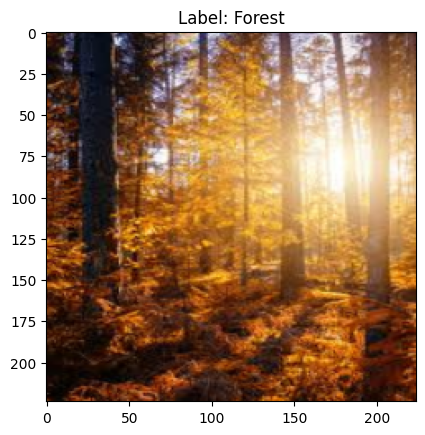

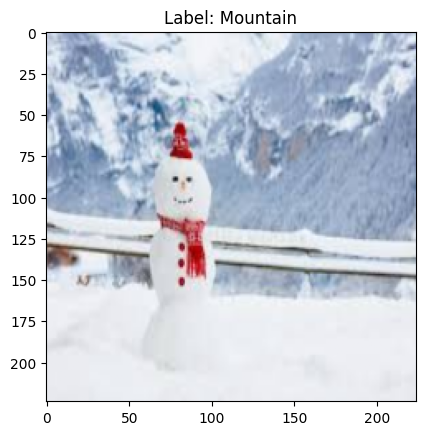

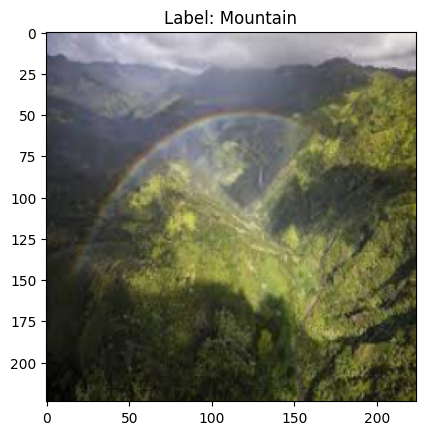

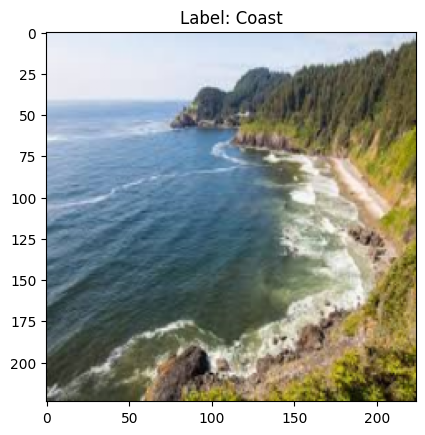

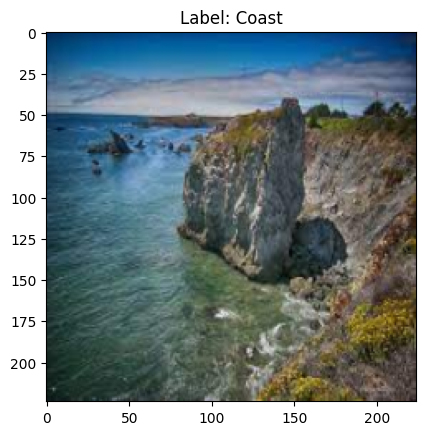

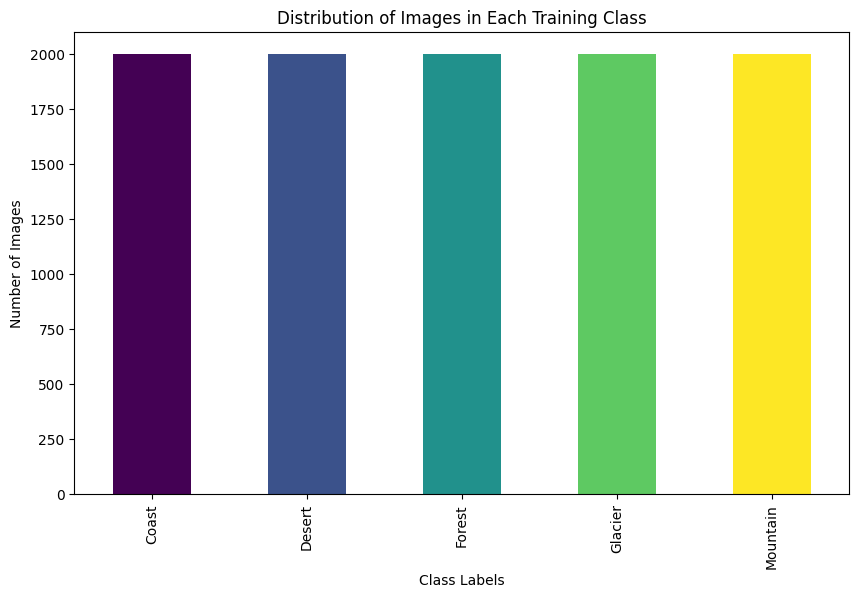

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random


label_counts = train_df['label'].value_counts()
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts)))
random_indices = np.random.choice(len(train_dataset), size=5, replace=False)

# Select 5 random samples
random_samples = [(train_dataset[i][0], train_dataset[i][1]) for i in random_indices]

# Display each random sample
for image, label in random_samples:
    image_np = image.permute(1, 2, 0).numpy()

    plt.imshow(image_np)
    plt.title(f'Label: {label}')
    plt.show()

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=unique_colors)
plt.title('Distribution of Images in Each Training Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
biometest =[]
imagetest = []
for subdir, dirs, files in os.walk(pathtest):
  for file in files:
    image_path = join(subdir, file)
    imagetest.append(image_path)
    biometest.append(relpath(subdir, pathtest))

In [ ]:
import pandas as pd

df = pd.DataFrame({'label': biometest, 'image_path': imagetest})
df.head()
test_df = df

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, dataframe, transform):
    self.dataframe = dataframe
    #self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    img_name = self.dataframe.iloc[idx, self.dataframe.columns.get_loc('image_path')]
    image = Image.open(img_name)
    image = self.transform(image)
    label = self.dataframe.iloc[idx, self.dataframe.columns.get_loc('label')]

    return image, label

transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),])
root_dir = './MLA_Final'
test_dataset = CustomDataset(test_df, transform)

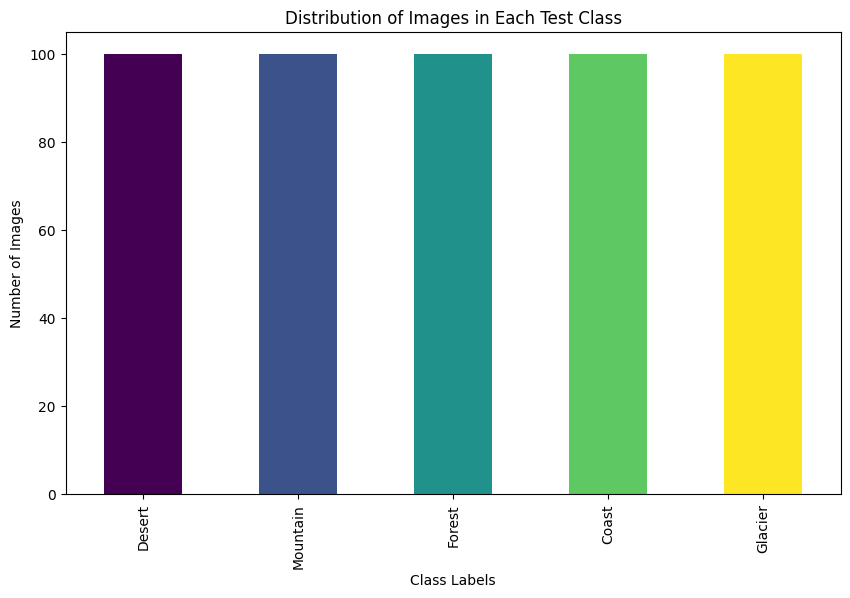

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
label_counts = test_df['label'].value_counts()
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts)))

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=unique_colors)
plt.title('Distribution of Images in Each Test Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
biomeval =[]
imageval = []
for subdir, dirs, files in os.walk(pathval):
  for file in files:
    image_path = join(subdir, file)
    imageval.append(image_path)
    biomeval.append(relpath(subdir, pathval))

In [ ]:
import pandas as pd

df = pd.DataFrame({'biome': biomeval, 'image_path': imageval})
df.head()
val_df = df

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, dataframe, transform):
    self.dataframe = dataframe
    #self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    img_name = self.dataframe.iloc[idx, self.dataframe.columns.get_loc('image_path')]
    image = Image.open(img_name)
    image = self.transform(image)
    label = self.dataframe.iloc[idx, self.dataframe.columns.get_loc('biome')]

    return image, label

transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),])
root_dir = './MLA_Final'
val_dataset = CustomDataset(val_df, transform)

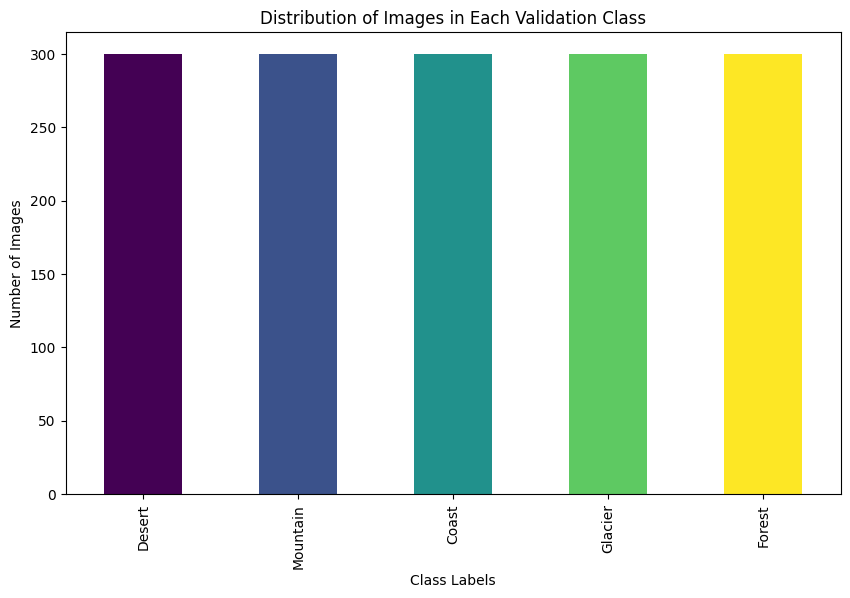

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
label_counts = val_df['biome'].value_counts()
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts)))

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=unique_colors)
plt.title('Distribution of Images in Each Validation Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer
model.add(Dropout(0.25))

# Add a fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second dropout layer
model.add(Dropout(0.25))

# Add a sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#can extract the features and run a logistic regression algorithm to compare results

# Add a third dropout layer
model.add(Dropout(0.25))

# Add a flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(512, activation='relu'))

# Add a fourth dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
sampled_dataset = train_df.sample(frac=0.5, random_state=42)
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # You may need additional preprocessing
batch_size = 32  # Adjust the batch size based on your system's capabilities
train_generator = data_generator.flow_from_dataframe(
    dataframe=sampled_dataset,
    x_col='image_path',
    y_col='label',
    batch_size=batch_size,
    class_mode='categorical',  # Adjust based on your label format
    target_size=(224, 224),  # Adjust based on your model's input size
)

train_features = feature_extractor.predict(train_generator, steps=len(train_generator))

train_features_flat = train_features.reshape(train_features.shape[0], -1)

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_features_flat, train_labels)

Found 5000 validated image filenames belonging to 5 classes.
157/157 [==============================] - 1539s 10s/step


NameError: ignored

In [ ]:
y_pred = knn.Classifier.predict(test_dataset)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

NameError: ignored